## English Numerical Image Recognition

Importing the important libraries

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

Collecting the dataset from `Keras` using `mnist`

In [2]:
mnist = tf.keras.datasets.mnist

Classification of data to tain and test dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Getting the accurecy and finalizing the model to get the output
Here, we are taking the input image shape only 28X28 px. as per need we can also change this pixel
All the model are going to save in the folder `handwritten.model`

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3)

model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2606 - accuracy: 0.9242
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1082 - accuracy: 0.9663
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0741 - accuracy: 0.9770
INFO:tensorflow:Assets written to: handwritten.model\assets


In [6]:
model = tf.keras.models.load_model('handwritten.model')

Getting the final accurecy of the model and printing it to the console

In [7]:
loss, accuracy = model.evaluate(x_test,y_test)

print(loss)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0900 - accuracy: 0.9705
0.0900033712387085
0.9704999923706055


Using the `PNG` images we are going to predict the numerical value and can get the most probable value of handwritten digit

the number is : 5 


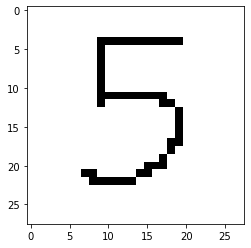

In [22]:
image_numer = 1
try:
    img = cv2.imread(f"Digits/five.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"the number is : {np.argmax(prediction)} ")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
except:
    print("Error")
    